In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, recall_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn import tree
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


In [67]:
column_names = ['ID', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']
df = pd.read_csv("../breast-cancer-data.data",sep=',')
df.columns = column_names
df =df.drop(['ID'],axis=1)
df.head()
X = df.drop('Diagnosis',axis=1).copy()
y = df['Diagnosis'].copy()
y = y.apply(lambda x: 1 if x == 'M' else 0)
#
# X_encoded = pd.get_dummies(X,columns=['sex','cp','fbs','restecg','exang','slope','thal']).astype(float)
# X_encoded.head()

In [68]:
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [79]:
from sklearn.ensemble import RandomForestClassifier

#my classifier
clf = RandomForestClassifier(min_samples_split=2,
                             random_state=42,
                             criterion = "gini", # {“gini”, “entropy”, “log_loss”}
                             max_features="sqrt" # {“sqrt”, “log2”, None}
                             )
clf.fit(X_train,y_train)

RandomForestClassifier()

My-DecisionTreeClassifier


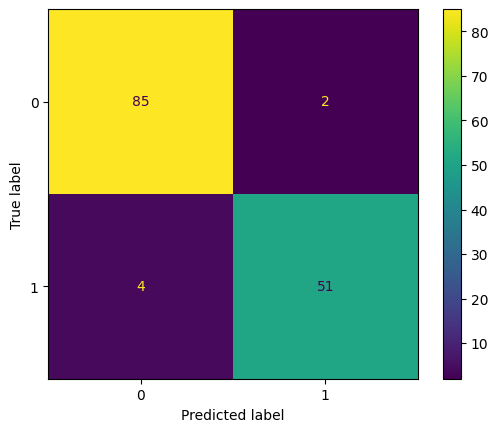

Precision: 0.9623
Accuracy: 0.9577
Sensitivity (Recall): 0.9273


In [80]:
from matplotlib import pyplot as plt
def plot_confusion_mat(ml_model,x_test1,y_test1):
    predictions = ml_model.predict(x_test1)
    cm = confusion_matrix(y_test1, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

def print_metrics(ml_model,x_test1,y_test1):
    predictions = ml_model.predict(x_test1)
    precision = precision_score(y_test1, predictions)
    accuracy = accuracy_score(y_test1, predictions)
    sensitivity = recall_score(y_test1, predictions)
    print(f'Precision: {precision:.4f}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Sensitivity (Recall): {sensitivity:.4f}')

print("My-DecisionTreeClassifier")
plot_confusion_mat(clf,X_test,y_test)
print_metrics(clf,X_test,y_test)

In [83]:
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

#Decision-Tree
decision_tree = tree.DecisionTreeClassifier(min_samples_leaf=2,max_depth=2,min_samples_split=2)
decision_tree.fit(X_train,y_train)

#KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train, y_train)

#Support-vector-machine
clf_svm = SVC(random_state = 42)
clf_svm.fit(X_train,y_train)

SVC(random_state=42)

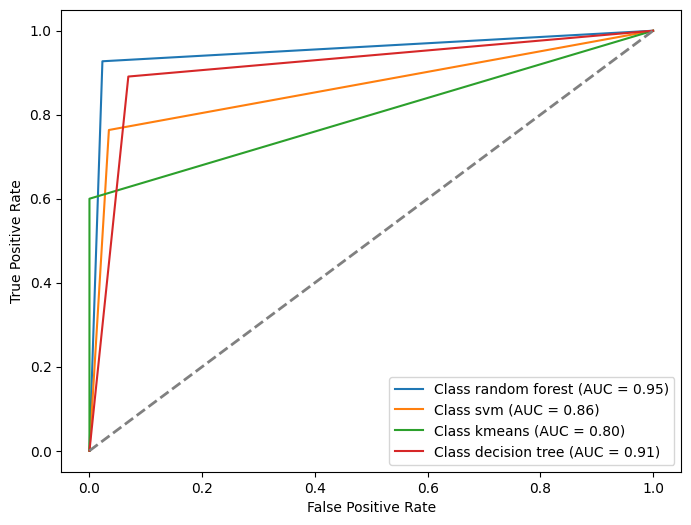

In [85]:
y_score_svm = clf_svm.predict(X_test)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_score_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

y_score_kmeans = kmeans.predict(X_test)
fpr_kmeans, tpr_kmeans, thresholds_kmeans = roc_curve(y_test, y_score_kmeans)
roc_auc_kmeans = auc(fpr_kmeans, tpr_kmeans)

y_score_dt = decision_tree.predict(X_test)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_score_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

y_score_rf = clf.predict(X_test)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))

plt.plot(fpr_rf, tpr_rf, label=f'Class random forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'Class svm (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_kmeans, tpr_kmeans, label=f'Class kmeans (AUC = {roc_auc_kmeans:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Class decision tree (AUC = {roc_auc_dt:.2f})')

# Plot a diagonal line for reference
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='lower right')

# Show the plot
plt.savefig('images/ROC-AUC curve.png')
plt.show()

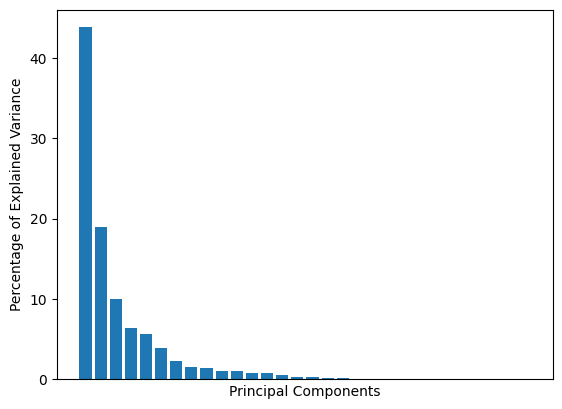

In [60]:
from sklearn.decomposition import PCA

pca= PCA(random_state=41)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var)
plt.tick_params(
axis='x',# changes apply to the x-axis
which='both',# both major and minor ticks are affected
bottom=False,# ticks along the bottom edge are off
top=False,# ticks along the top edge are off
labelbottom=False) # labels along the bottom edge are off
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.savefig('images/Pca-scree-plot.png')
plt.show()

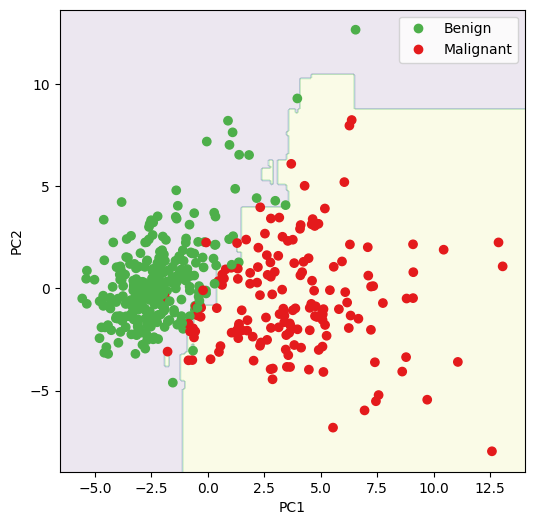

In [61]:
from matplotlib import colors
clf.fit(np.vstack((X_train_pca[:, 0], X_train_pca[:, 1])).T,y_train)
x_min = X_train_pca[:, 0].min() - 1
x_max = X_train_pca[:, 0].max() + 1

y_min = X_train_pca[:, 1].min() - 1
y_max =X_train_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
np.arange(start=y_min, stop=y_max, step=0.1))
Z = clf.predict(np.column_stack((xx.ravel(), yy.ravel( ))))
Z = Z.reshape(xx.shape)

_, ax = plt.subplots(figsize=(6,6))
ax.contourf(xx, yy, Z, alpha=0.1)

## now create custom colors for the actual data points
cmap = colors.ListedColormap( ['#4daf4a', '#e41a1c'])
scatter = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train,cmap=cmap)

## now create a legend
legend = ax. legend(scatter. legend_elements() [0],
scatter. legend_elements() [1],
loc="upper right")
legend.get_texts() [0].set_text("Benign")
legend.get_texts() [1].set_text("Malignant")

## now add axis labels and titles
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
plt.savefig("images/PCA scatter datapoints plot 2d.png")
plt.show()

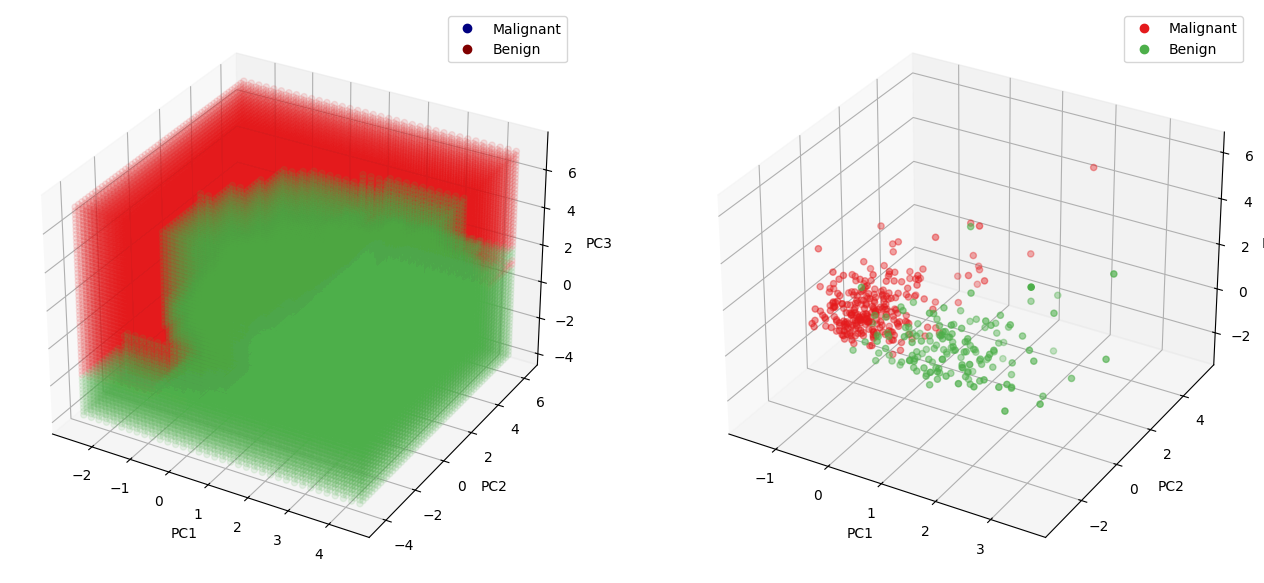

In [64]:
# create two 3d plots
fig, axes = plt.subplots(1, 2, figsize=(16, 8), subplot_kw={'projection': '3d'})

pca_train_scaled = scaler.fit_transform(np.vstack((X_train_pca[:, 0], X_train_pca[:, 1],X_train_pca[:, 2])).T)
clf.fit(pca_train_scaled,y_train)

"""First graph creation"""
x_min, x_max = pca_train_scaled[:, 0].min() - 1, pca_train_scaled[:, 0].max() + 1
y_min, y_max = pca_train_scaled[:, 1].min() - 1, pca_train_scaled[:, 1].max() + 1
z_min, z_max = pca_train_scaled[:, 2].min() - 1, pca_train_scaled[:, 2].max() + 1
xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, 0.2),
                         np.arange(y_min, y_max, 0.2),
                         np.arange(z_min, z_max, 0.2))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
Z = Z.reshape(xx.shape)

# Axis labels and title
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_zlabel('PC3')

# Plot decision surface
axes[0].scatter3D(xx[Z == 0], yy[Z == 0], zz[Z == 0], color='#e41a1c', alpha=0.1)
axes[0].scatter3D(xx[Z == 1], yy[Z == 1], zz[Z == 1], color='#4daf4a', alpha=0.1)

# Create legend
legend = axes[0].legend(*scatter.legend_elements(), loc="upper right")
legend.get_texts()[0].set_text("Malignant")
legend.get_texts()[1].set_text("Benign")

"""Second graph creation"""
# Plot data points
cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])
scatter = axes[1].scatter3D(pca_train_scaled[:, 0], pca_train_scaled[:, 1], pca_train_scaled[:, 2], c=y_train, cmap=cmap)

# Create legend
legend = axes[1].legend(*scatter.legend_elements(), loc="upper right")
legend.get_texts()[0].set_text("Malignant")
legend.get_texts()[1].set_text("Benign")

# Axis labels and title
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_zlabel('PC3')

plt.savefig('images/PCA datapoints and decision surface 3d plot.png')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10028\1441377045.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = ax.scatter(mds_train_scaled[:, 0], mds_train_scaled[:, 1], c=y_train, cmap=plt.cm.get_cmap("jet"))


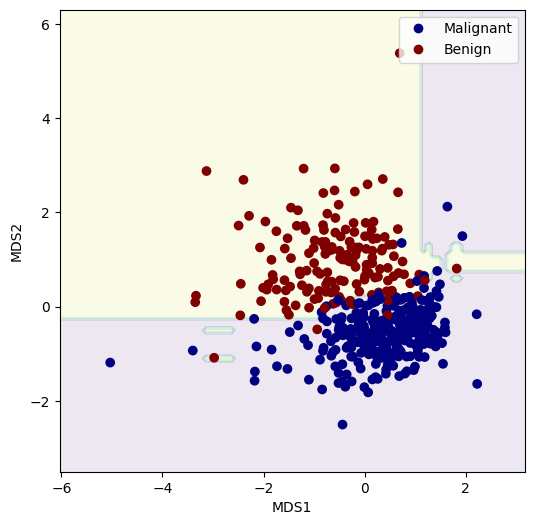

In [63]:

from sklearn.manifold import MDS

mds = MDS(random_state=41)
train_mds_cords = mds.fit_transform(X_train_scaled)
mds_train_scaled = scaler.fit_transform(np.vstack((train_mds_cords[:, 0], train_mds_cords[:, 1])).T)
clf.fit(mds_train_scaled,y_train)


x_min = mds_train_scaled[:, 0].min() - 1
x_max = mds_train_scaled[:, 0].max() + 1

y_min = mds_train_scaled[:, 1].min() - 1
y_max =mds_train_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
np.arange(start=y_min, stop=y_max, step=0.1))
Z = clf.predict(np.column_stack((xx.ravel(), yy.ravel( ))))
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(6,6))
ax.contourf(xx, yy, Z, alpha=0.1)
scatter = ax.scatter(mds_train_scaled[:, 0], mds_train_scaled[:, 1], c=y_train, cmap=plt.cm.get_cmap("jet"))

## now create a legend
legend = ax. legend(scatter. legend_elements() [0],
scatter. legend_elements() [1],
loc="upper right")
legend.get_texts() [0].set_text("Malignant")
legend.get_texts() [1].set_text("Benign")

ax.set_xlabel('MDS1')
ax.set_ylabel('MDS2')

plt.savefig("images/MDS scatter datapoints plot 2d.png")
plt.show()